### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


### First, import the necessary libraries

In [27]:
#Pandas and numpy
import pandas as pd 
import numpy as np 

#The necessary modules from sklearn
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [9]:
df = pd.read_csv(r'/Users/IAmLeoSanchez/Documents/Data_Science/The_Bridge/GIT_HUB_LEO/Data_Science_Bootcamp_Leo/data_science_nov_20_leo/week8/day4/data/usuarios_win_mac_lin.csv')

In [17]:
#Define a function that provides relevant info of the DataFrame

def df_info(df):
    '''
    @leosanchezsoler
    The function provides all the relevant info of a pandas.DataFrame
        Arguments:
            - df: a pandas.Dataframe
        Prints:
            - df.shape[0]: number of rows
            - df.shape[1]: number of columns
            - df.columns: the name of the dataset columns'
            - df.info(): basic info about the dataset
            - df.isna().sum(): NaN values per column
    '''
    print('####\nDATAFRAME INFO\n####')
    print('\nNumber of rows:', df.shape[0])
    print('Number of columns:', df.shape[1])
    print('\n#### DATAFRAME COLUMNS ####\n', df.columns, '\n')
    print('### DATAFRAME COLUMN TYPES ###\n')
    print('\n', df.info()) 
    print('\n### TOTAL NaN VALUES ###\n')
    print(df.isna().sum())

In [18]:
df_info(df=df)

####
DATAFRAME INFO
####

Number of rows: 170
Number of columns: 5

#### DATAFRAME COLUMNS ####
 Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object') 

### DATAFRAME COLUMN TYPES ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB

 None

### TOTAL NaN VALUES ###

duracion    0
paginas     0
acciones    0
valor       0
clase       0
dtype: int64


### Drop all rows in which `clase = 1` 

In [22]:
df = df[df.clase != 1]
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


### Use `pandas.Dataframe.describe()`
- Generating descriptive statistics about the data that summarize the central tendency, dispersion, and shape of a dataset's distribution

- No `NaN` values included

In [23]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,97.180708,2.069231,9.053846,30.769231,0.676923
std,198.611241,1.629136,10.098976,47.961150,0.950034
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,6.000000,0.000000
50%,12.000000,1.000000,6.000000,15.000000,0.000000
75%,65.250000,2.000000,12.000000,35.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


## Exploratory Data Analysis
### Visualizing the __Available Data__ using `pairplot`
- Exploring types of relationships across the dataset

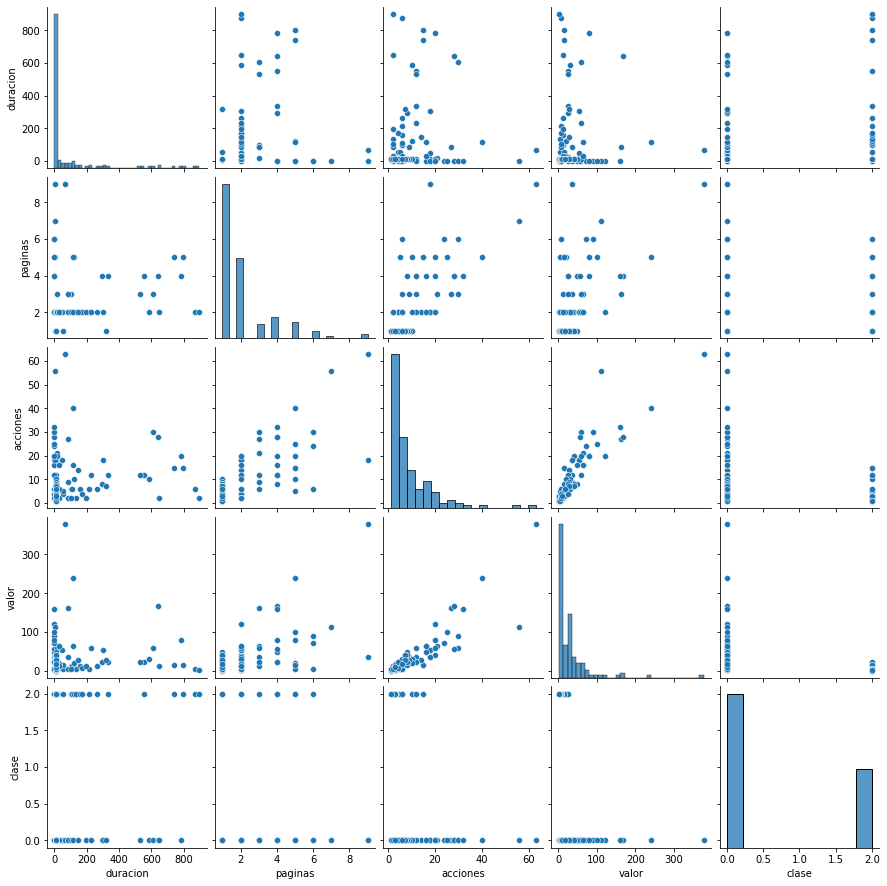

In [28]:
sns.pairplot(df)
plt.show()

### Display correlation among all columns
- See how different variables can be related

In [29]:
df.corr()

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.252132,0.139796,0.062776,0.128234
paginas,0.252132,1.000000,0.732909,0.583472,-0.050548
acciones,0.139796,0.732909,1.000000,0.878787,-0.335095
valor,0.062776,0.583472,0.878787,1.000000,-0.363006
clase,0.128234,-0.050548,-0.335095,-0.363006,1.000000


### Displaying correlation using Heat Map

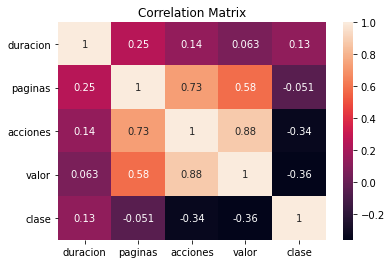

In [32]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

## Training a Logistic Regression Model

We will need to split up our data into an `X` array that contains features to train on, and a `y` array with the __target__ variable
* In this case, the `clase` column.
* Bear in mind that `duracion` column type is float, so it has to be turned into an integer so the model can interpret it

### Split the data

In [44]:
# 'duracion' column to int
df.duracion = df.duracion.astype('int')
print('df.duracion type:', df.duracion.dtype)

# Feature columns --> X
X = df[['duracion', 'paginas', 'acciones', 'valor']]

# The Target --> y
y = df['clase']

#Check both X and y shapes
print('\nX shape:', X.shape)
print('y shape:', y.shape)

df.duracion type: int64

X shape: (130, 4)
y shape: (130,)


### Visualize the data now
- Plotting a histogram to check each column tendency

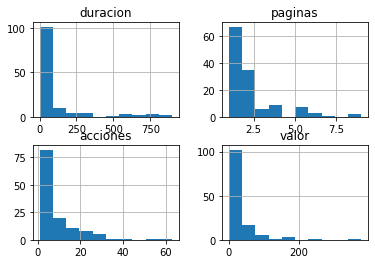

In [46]:
X.hist()
plt.show()

- Drawing a pairplot to show linnear regression

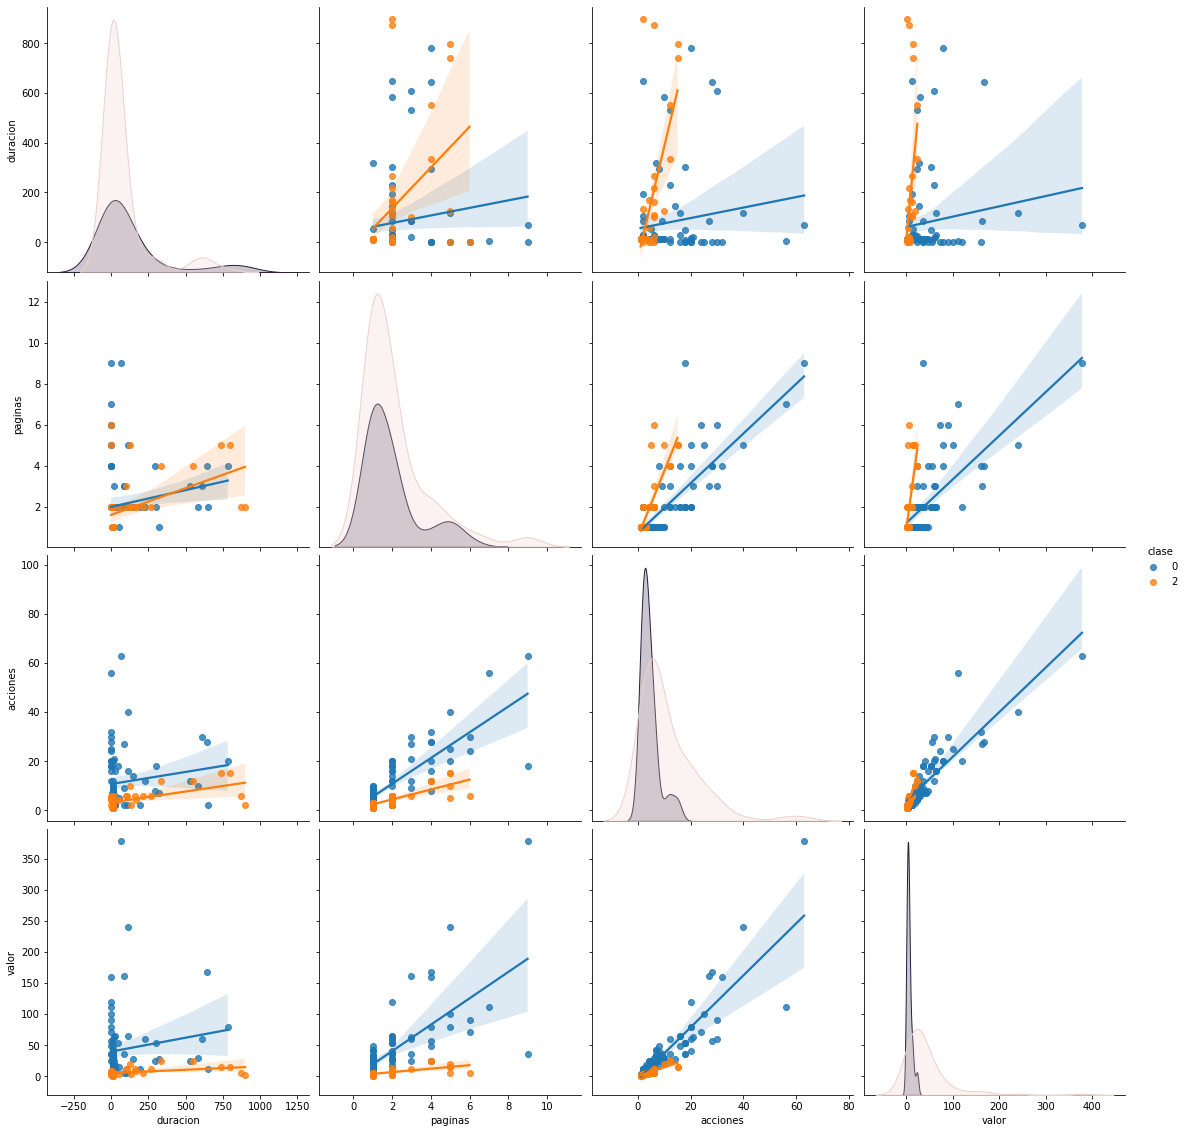

In [47]:
sns.pairplot(df, hue='clase', size=4, vars=['duracion', 'paginas', 'acciones', 'valor'], kind='reg')
plt.show()

- Now that we've explored both sets, let's go ahead and split it into __training__ and __testing__ sets

The model will be trained with these `two sets`:

- X_train --> the X train set\
- y_train --> the y train set

After the training, the model will be tested with the `other two`:

- X_test --> the X test set
- y_test --> the y test set


Use `model_selection.train_test_split()` from sklearn

In [54]:
# test_size --> a variable that contains the amount of data for the test sets
test_size = 0.2

# seed --> the way in which data will be randomly assigned to both train and test splits
seed = 99

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [55]:
def check_train_test_shape(X, y, X_train, y_train, X_test, y_test):
    '''
    @leosanchezsoler
    This function is used to check both training and testing sets' shape
        Arguments:
            - X: the intercept
            - y: the coef
            - X_train: the intercept's training set
            - y_train: the coef's training set
            - X_test: the intercept's test set
            - y_test: the coef's test set
    '''
    print('#### AVAILABLE DATA ####\n')
    print('X:', X.shape)
    print('y:', y.shape)
    print('\n#### TRAIN SETS ####\n')
    print('X_train:', X_train.shape)
    print('y_train:', y_train.shape)
    print('\n#### TEST SETS ####\n')
    print('X_test:', X_test.shape)
    print('y_test:', y_test.shape)

In [56]:
check_train_test_shape(X=X, y=y, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

#### AVAILABLE DATA ####

X: (130, 4)
y: (130,)

#### TRAIN SETS ####

X_train: (104, 4)
y_train: (104,)

#### TEST SETS ####

X_test: (26, 4)
y_test: (26,)


## Model = `LogisticRegression()`

In [57]:
#Assign the LogisticRegression model to a variable
model = linear_model.LogisticRegression(n_jobs=-1)
model

LogisticRegression(n_jobs=-1)

### Train the model with the ** train sets **

In [58]:
# Use .fit method to do it
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [65]:
def check_scores(model, X_set, y_set):
    '''
    @leosanchezsoler
    This function checks the scores of a model.
        Arguments:
            - model: the Machine Learning Model applied to the data
            - X_set: the Feature set (X, X_train, X_test...)
            - y_set: the Target set (y, y_train, y_test...)
    '''
    print('Model score:', model.score(X_set, y_set))
    print('\nModel score (percentage):', round(model.score(X_set, y_set) * 100, 2), '%')

In [66]:
check_scores(model=model, X_set=X_train, y_set=y_train)

Model score: 0.9423076923076923

Model score (percentage): 94.23 %


### As we can see, the model has a high score within the train sets
- This means that it has predicted the data quite accurately

### Now let's apply this model to the test set

In [67]:
# Assign to the variable predictions that it will make for the X values in the test set
predictions = model.predict(X_test)
print(predictions)

[2 0 0 0 0 2 2 2 0 0 0 0 2 0 2 2 2 2 0 0 2 0 0 0 0 2]


### Now, let's see the score of our model with `X_test` and `y_test`

In [68]:
check_scores(model=model, X_set=X_test, y_set=y_test)

Model score: 1.0

Model score (percentage): 100.0 %


## Our Model has a score of 100% with the test sets.
- This may mean many things:
    - The model works perfectly
    - The data is misleading
    - It's time to try with new unknown values

### `X_new` is a new feature value that our model has to predict

In [69]:
X_new = pd.DataFrame({'duracion': [25], 'paginas': [5], 'acciones': [6], 'valor': [10]})
X_new

,duracion,paginas,acciones,valor
0,25,5,6,10


In [71]:
X_new.shape

(1, 4)

### Now our model will predict the `clase` value (0 or 2) that should be assigned to our label

In [73]:
model.predict(X_new)

array([2])

## Model Validation
- Make a cross validation to later check our accuracy score

`Kfold` is the validation set within the training set

- The n_splits are the amount of iterations that the model will do to use cross validation


In [78]:
# Assign the Kfold to a variable
# Remember that the random_state has to be the same than used in the train_test_split function

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

# cv_results contains the results of cross validation
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

msg = cv_results.mean(), cv_results.std()

print('Cross validation results:\n', cv_results)
print('\nmsg:', msg)

Cross validation results:
 [1.         0.63636364 0.90909091 1.         0.9        1.
 1.         0.8        1.         0.8       ]

msg: (0.9045454545454547, 0.11805937713254978)


### Check the accuracy score

In [82]:
print('Accuracy score:', accuracy_score(y_test, predictions))

Accuracy score: 1.0


## The accuracy score is 1
This means that the model can predict with 100% of efectiveness

### Finally, let's draw a `confusion matrix`
- This matrix is used to check if there have been wrong or unexpected predictions of a value in our model
- Here, there are not false negatives or positives, so the model seems perfect

In [84]:
print(confusion_matrix(y_test, predictions))

[[15  0]
 [ 0 11]]


### Once we've taken all the necessary steps, it's time to use the model with all our available data



In [97]:
print('Model prediction with all our available data:')
model.predict(X)

Model prediction with all our available data:


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0])

In [98]:
check_scores(model=model, X_set=X, y_set=y)

Model score: 0.9538461538461539

Model score (percentage): 95.38 %


#### The model's score is `very high`  and does not differ much with the results given from the test model
- Although this result may seem satisfactory for our purposes, our score and prediction models has to be constantly reviewed. 
- 95% of score can be enough or not depending on the field, software or model purposes

The model's accuracy has improved considerably after removing clase=1 from our dataset.
- This may be caused for several reasons:
    - Less choices for our model
    - Narrow data
    
## Logistic Regression is an algorithm mostly used for binary predictions, due to its simplicity and effectiveness.
## After resizing the dataset, the chances of getting right predictions increase.

## Bonus:
As it happens in many prediction models, a satisfactory score should not misguide us because there are many factors that interact and need to be reviewed
- Let's change both the test_size and the random seed of our split
    - The test set will contain 55% of the available data

In [100]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.45, random_state=888)

model.fit(X_train, y_train)

print('Model prediction after readjusting some parameters:\n', model.predict(X_train))

Model prediction after readjusting some parameters:
 [2 0 2 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 2 2 2 0
 0 0 0 2 2 0 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 0 0 0 0 0 2]


In [101]:
check_scores(model=model, X_set=X_train, y_set=y_train)


Model score: 0.9436619718309859

Model score (percentage): 94.37 %


In [106]:
check_train_test_shape(X=X, y=y, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

#### AVAILABLE DATA ####

X: (130, 4)
y: (130,)

#### TRAIN SETS ####

X_train: (71, 4)
y_train: (71,)

#### TEST SETS ####

X_test: (59, 4)
y_test: (59,)


### The test set is now larger than before. Let's see what happens...

In [102]:
model.predict(X_test)

array([0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0])

In [103]:
check_scores(model=model, X_set=X_test, y_set=y_test)

Model score: 0.9322033898305084

Model score (percentage): 93.22 %


### With this new treshold the data reveals something new when drawing the `confusion matrix`

In [109]:
confusion_matrix(y_test, model.predict(X_test))

array([[35,  1],
       [ 3, 20]])

### Of 36 times in which clase was `0`, it identified 35 correctly, but 1 time it said it was clase = 2

### Of 23 times in which clase was `2` it identified 20 correctly but 3 times it said it was clase = 0

# Time to play around!!

In [118]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=44)

modelo_prueba = linear_model.LogisticRegression(n_jobs=-1, max_iter=3, solver='saga', class_weight='balanced', multi_class='multinomial')
modelo_prueba.fit(X_train, y_train)

print('Model prediction after readjusting some parameters:\n', model.predict(X_train))

Model prediction after readjusting some parameters:
 [0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 2 2 0 2 0 2 0 0 2 2 0 0 2 0
 0 2 0 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2 0 2 2 0 2 2 0 0 0 2 2 0 0 0 0
 0 0 2 0 2 0 0 0 0 0 2 0 2 0 2 2 2]


In [119]:
# I have no idea of what's going on!
check_scores(model=modelo_prueba, X_set=X_train, y_set=y_train)

Model score: 0.7472527472527473

Model score (percentage): 74.73 %
